In [57]:
import os
import time

import dill
import matplotlib.pyplot as plt
import pandas as pd

from collab.foraging import central_park_birds as cpb
from collab.foraging import toolkit as ft
from collab.utils import find_repo_root

root = find_repo_root()

# the smoke test code is to make sure that the code runs without error
# during continuous integration
# can be ignored by the reader
smoke_test = "CI" in os.environ
frames = 150 if smoke_test else 300
frames_sps = 150 if smoke_test else 2300
sampling_rate = 0.001 if smoke_test else 0.01

notebook_starts = time.time()

In [58]:
root

PosixPath('/Users/Admin/Repositories/collab-creatures')

In [23]:
fish_test_raw = pd.read_csv(
    os.path.join(
        root, 
        "data/fish_all_ages/4wpf_060222_3.csv",
    )
)

fish_test_raw = fish_test_raw.rename(columns={"fish": "forager"})

Do we need to subsample frames and rescale grid??

Losing important information by doing that -- 

esp. rescaling to grid makes us lose info about different step sizes / velocities / interaction lengths that fish of different ages will have. Also does a grid make sense for a circular tank?

In [48]:
fish_sub = ft.subset_frames_evenly_spaced(fish_test_raw, frames)
fish_sub = ft.rescale_to_grid(fish_sub, 90)
fish_obj = ft.object_from_data(
    fish_sub, grid_size=90, frames=frames, calculate_step_size_max=True
)

original_frames: 18184
original_shape: (72740, 5)
resulting_frames: 300
resulting_shape: (1200, 5)
min_time 1
max_time 300


In [49]:
#step-size
print(fish_obj.step_size_max)

12.0


In [50]:
#forager-to-forager distances
fish_distances = ft.foragers_to_forager_distances(fish_obj)


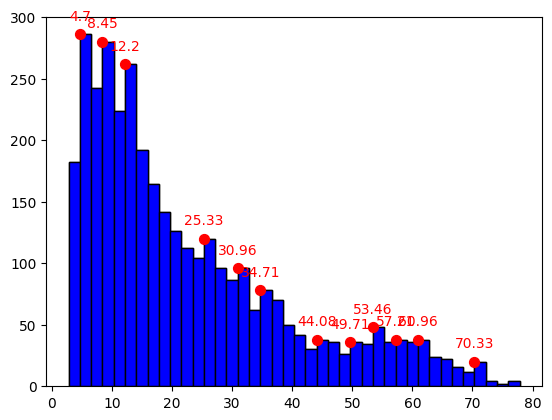

In [51]:
ft.distances_and_peaks(fish_distances)

In [52]:
# visibility
fish_vis = cpb.cp_generate_visibility(fish_obj.foragers, sampling_rate=sampling_rate)
fish_obj.visibility = fish_vis["visibility"]
fish_obj.visibilityDF = fish_vis["visibilityDF"]

print(fish_obj.visibilityDF.shape)

(31656, 8)


In [53]:
path = os.path.join(
    root,
    f"data/fish_all_ages/fish_all_ages_testobj/fish_test_{sampling_rate}.pkl",
)
if not os.path.exists(path):
    test_me = [10, 20, 30, 40, 50, 60, 70, 80]  # [19, 46, 85]
    fish_objects = cpb.cp_derive(fish_obj, test_me, fish_distances)
    with open(path, "wb") as file:
        dill.dump(fish_objects, file)


Processing optimal proximity parameter 10


/Users/Admin/Repositories/collab-creatures/collab/foraging/central_park_birds/central_park.py:140: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  proximity[forager][frame_index]["proximity_standardized"].fillna(
/Users/Admin/Repositories/collab-creatures/collab/foraging/central_park_birds/central_park.py:140: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the inte

ValueError: cannot convert float NaN to integer

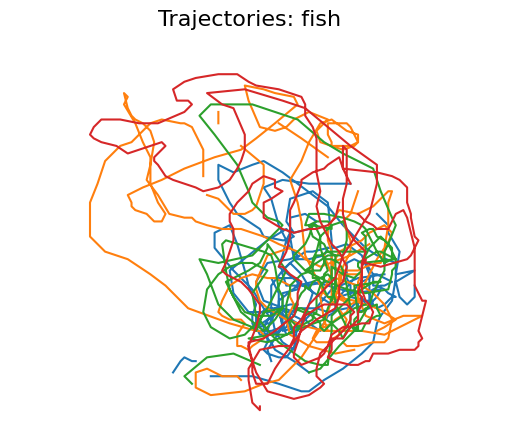

In [54]:
fig = ft.plot_trajectories(fish_obj.foragersDF, "fish")
fig.show()

In [55]:
fig = ft.plot_distances(fish_distances, "fish")
fig.show()
